<a href="https://colab.research.google.com/github/iamatul1214/tensorflow/blob/main/Different_optimisers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
root = "/content/drive/MyDrive/Colab_practices"
os.chdir(root)

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext tensorboard
import time

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [6]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

11501568/11490434 [==============================] - 0s 0us/step


In [9]:
tf.random.set_seed(42)
np.random.seed(42)

LAYERS = [
          tf.keras.layers.Flatten(input_shape = [28,28]),
          tf.keras.layers.Dense(300,kernel_initializer = "he_normal"),
          tf.keras.layers.LeakyReLU(),
          tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
          tf.keras.layers.LeakyReLU(),
          tf.keras.layers.Dense(10, activation="softmax")]

model = tf.keras.models.Sequential(LAYERS)

In [20]:
## Now we will create a dictionary which will store all the optimisers with the time taken to train with them

time_optimiser_dict = {}

In [10]:
## SGD

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trai

In [21]:
begin = time.time()
sgd_model = model.fit(X_train , y_train, epochs = 10, validation_data=(X_valid,y_valid), verbose = 2)
end = time.time()
total_time_SGD = end - begin 
time_optimiser_dict['SGD_time'] = total_time_SGD
print(time_optimiser_dict)

Epoch 1/10
1719/1719 - 5s - loss: 0.2012 - accuracy: 0.9434 - val_loss: 0.1958 - val_accuracy: 0.9448 - 5s/epoch - 3ms/step
Epoch 2/10
1719/1719 - 5s - loss: 0.1988 - accuracy: 0.9442 - val_loss: 0.1939 - val_accuracy: 0.9466 - 5s/epoch - 3ms/step
Epoch 3/10
1719/1719 - 5s - loss: 0.1966 - accuracy: 0.9445 - val_loss: 0.1920 - val_accuracy: 0.9470 - 5s/epoch - 3ms/step
Epoch 4/10
1719/1719 - 5s - loss: 0.1945 - accuracy: 0.9454 - val_loss: 0.1906 - val_accuracy: 0.9476 - 5s/epoch - 3ms/step
Epoch 5/10
1719/1719 - 5s - loss: 0.1924 - accuracy: 0.9464 - val_loss: 0.1885 - val_accuracy: 0.9484 - 5s/epoch - 3ms/step
Epoch 6/10
1719/1719 - 5s - loss: 0.1903 - accuracy: 0.9470 - val_loss: 0.1871 - val_accuracy: 0.9490 - 5s/epoch - 3ms/step
Epoch 7/10
1719/1719 - 6s - loss: 0.1884 - accuracy: 0.9472 - val_loss: 0.1854 - val_accuracy: 0.9496 - 6s/epoch - 3ms/step
Epoch 8/10
1719/1719 - 6s - loss: 0.1865 - accuracy: 0.9477 - val_loss: 0.1840 - val_accuracy: 0.9500 - 6s/epoch - 4ms/step
Epoch 9/

In [14]:
## AdGRAD

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-3),
              metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trai

In [22]:
begin = time.time()
Adagrad_model = model.fit(X_train , y_train, epochs = 10, validation_data=(X_valid,y_valid), verbose = 2)
end = time.time()
total_time_Adagrad = end - begin
time_optimiser_dict['Adagrad_time'] = total_time_Adagrad
print(time_optimiser_dict)

Epoch 1/10
1719/1719 - 5s - loss: 0.1812 - accuracy: 0.9497 - val_loss: 0.1795 - val_accuracy: 0.9512 - 5s/epoch - 3ms/step
Epoch 2/10
1719/1719 - 5s - loss: 0.1795 - accuracy: 0.9499 - val_loss: 0.1781 - val_accuracy: 0.9516 - 5s/epoch - 3ms/step
Epoch 3/10
1719/1719 - 5s - loss: 0.1780 - accuracy: 0.9503 - val_loss: 0.1768 - val_accuracy: 0.9524 - 5s/epoch - 3ms/step
Epoch 4/10
1719/1719 - 5s - loss: 0.1764 - accuracy: 0.9507 - val_loss: 0.1759 - val_accuracy: 0.9530 - 5s/epoch - 3ms/step
Epoch 5/10
1719/1719 - 5s - loss: 0.1749 - accuracy: 0.9513 - val_loss: 0.1743 - val_accuracy: 0.9534 - 5s/epoch - 3ms/step
Epoch 6/10
1719/1719 - 5s - loss: 0.1734 - accuracy: 0.9514 - val_loss: 0.1733 - val_accuracy: 0.9532 - 5s/epoch - 3ms/step
Epoch 7/10
1719/1719 - 6s - loss: 0.1720 - accuracy: 0.9521 - val_loss: 0.1721 - val_accuracy: 0.9542 - 6s/epoch - 3ms/step
Epoch 8/10
1719/1719 - 5s - loss: 0.1706 - accuracy: 0.9525 - val_loss: 0.1711 - val_accuracy: 0.9554 - 5s/epoch - 3ms/step
Epoch 9/

In [23]:
## RMSprop

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trai

In [31]:
begin = time.time()
RMSprop_model = model.fit(X_train , y_train, epochs = 10, validation_data=(X_valid,y_valid), verbose = 2)
end = time.time()
total_time_RMSprop = end - begin
time_optimiser_dict['RMSprop time'] = total_time_RMSprop
print(time_optimiser_dict)

Epoch 1/10
1719/1719 - 5s - loss: 0.0250 - accuracy: 0.9940 - val_loss: 0.1793 - val_accuracy: 0.9758 - 5s/epoch - 3ms/step
Epoch 2/10
1719/1719 - 6s - loss: 0.0277 - accuracy: 0.9930 - val_loss: 0.1836 - val_accuracy: 0.9752 - 6s/epoch - 3ms/step
Epoch 3/10
1719/1719 - 5s - loss: 0.0228 - accuracy: 0.9941 - val_loss: 0.1663 - val_accuracy: 0.9766 - 5s/epoch - 3ms/step
Epoch 4/10
1719/1719 - 5s - loss: 0.0202 - accuracy: 0.9945 - val_loss: 0.1793 - val_accuracy: 0.9778 - 5s/epoch - 3ms/step
Epoch 5/10
1719/1719 - 5s - loss: 0.0253 - accuracy: 0.9936 - val_loss: 0.2444 - val_accuracy: 0.9738 - 5s/epoch - 3ms/step
Epoch 6/10
1719/1719 - 5s - loss: 0.0265 - accuracy: 0.9936 - val_loss: 0.2185 - val_accuracy: 0.9770 - 5s/epoch - 3ms/step
Epoch 7/10
1719/1719 - 5s - loss: 0.0232 - accuracy: 0.9944 - val_loss: 0.2226 - val_accuracy: 0.9756 - 5s/epoch - 3ms/step
Epoch 8/10
1719/1719 - 5s - loss: 0.0215 - accuracy: 0.9949 - val_loss: 0.2283 - val_accuracy: 0.9728 - 5s/epoch - 3ms/step
Epoch 9/

In [26]:
## ADAM
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trai

In [29]:
begin = time.time()
Adam_model = model.fit(X_train , y_train, epochs = 10, validation_data=(X_valid,y_valid), verbose = 2)
end = time.time()
total_time_ADAM = end - begin
time_optimiser_dict['Adam time'] = total_time_ADAM
print(time_optimiser_dict)

Epoch 1/10
1719/1719 - 5s - loss: 0.0338 - accuracy: 0.9901 - val_loss: 0.1719 - val_accuracy: 0.9708 - 5s/epoch - 3ms/step
Epoch 2/10
1719/1719 - 5s - loss: 0.0251 - accuracy: 0.9923 - val_loss: 0.1310 - val_accuracy: 0.9758 - 5s/epoch - 3ms/step
Epoch 3/10
1719/1719 - 5s - loss: 0.0283 - accuracy: 0.9917 - val_loss: 0.1480 - val_accuracy: 0.9786 - 5s/epoch - 3ms/step
Epoch 4/10
1719/1719 - 5s - loss: 0.0307 - accuracy: 0.9915 - val_loss: 0.1979 - val_accuracy: 0.9702 - 5s/epoch - 3ms/step
Epoch 5/10
1719/1719 - 5s - loss: 0.0272 - accuracy: 0.9919 - val_loss: 0.1804 - val_accuracy: 0.9728 - 5s/epoch - 3ms/step
Epoch 6/10
1719/1719 - 5s - loss: 0.0261 - accuracy: 0.9928 - val_loss: 0.1278 - val_accuracy: 0.9796 - 5s/epoch - 3ms/step
Epoch 7/10
1719/1719 - 5s - loss: 0.0286 - accuracy: 0.9923 - val_loss: 0.1805 - val_accuracy: 0.9740 - 5s/epoch - 3ms/step
Epoch 8/10
1719/1719 - 5s - loss: 0.0246 - accuracy: 0.9932 - val_loss: 0.1770 - val_accuracy: 0.9752 - 5s/epoch - 3ms/step
Epoch 9/

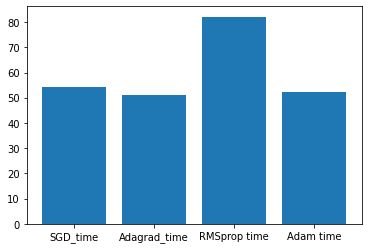

In [32]:
## Plotting the time taken by each optimiser
plt.bar(*zip(*time_optimiser_dict.items()))
plt.show()